Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')
!gdown --id "1xLfSQUGDl8ezNNbUkpuHOYvSpTyxVhCs"
!unzip /content/CNN_assignment.zip
##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Downloading...
From: https://drive.google.com/uc?id=1xLfSQUGDl8ezNNbUkpuHOYvSpTyxVhCs
To: /content/CNN_assignment.zip
824MB [00:07, 112MB/s] 
Archive:  /content/CNN_assignment.zip
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024654.jpg  
 

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180
seed=123

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=seed, 
    validation_split=0.2,
    subset="training",
    image_size=(img_height,img_width), 
    batch_size=batch_size,
) ##todo

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds =tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_test,
    seed=seed, 
    validation_split=0.2,
    subset="validation",
    image_size=(img_height,img_width), 
    batch_size=batch_size,
) ##todo

Found 118 files belonging to 9 classes.
Using 23 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(sorted(class_names))

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [ ]:
# Keras.preprocessing
# The 1./255 is to convert from uint8 to float32 in range [0,1].
image_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)


STEPS_PER_EPOCH = np.ceil((image_count_train+image_count_test)/batch_size)

train_data_gen = image_generator.flow_from_directory(directory=data_dir_train,
                                                     batch_size=batch_size,
                                                     shuffle=True,
                                                     target_size=(img_height,img_width),
                                                     classes = class_names)
test_data_gen = image_generator.flow_from_directory(directory=data_dir_test,
                                                     batch_size=batch_size,
                                                     shuffle=True,
                                                     target_size=(img_height,img_width),
                                                     classes = class_names)

Found 2239 images belonging to 9 classes.
Found 118 images belonging to 9 classes.


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

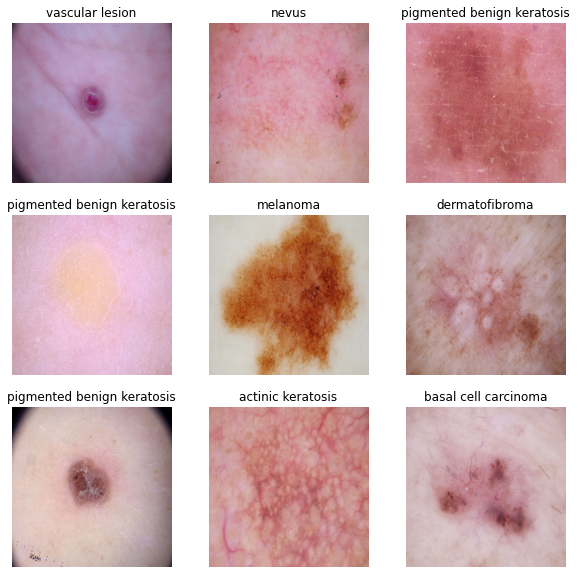

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

### your code goes here, you can use training or validation data to visualize

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
### Your code goes here

model=Sequential([
 #                 layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height,img_width,3)),
                  layers.Conv2D(32,kernel_size=(3,3),activation="relu",kernel_initializer="he_normal",input_shape=(img_height,img_width,3)),
                  layers.MaxPool2D((2,2)),
                  layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
                  layers.MaxPool2D(pool_size=(2,2)),
#                  layers.Dropout(0.25),
                  layers.Flatten(),
                  layers.Dense(128,activation="relu"),
                  layers.Dense(len(class_names),activation="softmax")
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 87, 87, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 43, 43, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 118336)            0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               15147136  
_________________________________________________________________
dense_13 (Dense)             (None, 9)                

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_data_gen,
  validation_data=test_data_gen,
  epochs=epochs,
  
)

Epoch 1/20
70/70 [==============================] - 40s 567ms/step - loss: 5.6422 - accuracy: 0.1970 - val_loss: 2.2268 - val_accuracy: 0.3220
Epoch 2/20
70/70 [==============================] - 39s 556ms/step - loss: 1.5212 - accuracy: 0.4800 - val_loss: 2.4415 - val_accuracy: 0.3220
Epoch 3/20
70/70 [==============================] - 39s 561ms/step - loss: 1.3988 - accuracy: 0.5159 - val_loss: 2.7995 - val_accuracy: 0.2797
Epoch 4/20
70/70 [==============================] - 39s 557ms/step - loss: 1.1984 - accuracy: 0.5988 - val_loss: 2.4788 - val_accuracy: 0.3220
Epoch 5/20
70/70 [==============================] - 39s 555ms/step - loss: 1.0080 - accuracy: 0.6562 - val_loss: 2.7573 - val_accuracy: 0.2712
Epoch 6/20
70/70 [==============================] - 39s 552ms/step - loss: 0.9018 - accuracy: 0.6837 - val_loss: 3.1014 - val_accuracy: 0.2881
Epoch 7/20
70/70 [==============================] - 39s 564ms/step - loss: 0.7708 - accuracy: 0.7366 - val_loss: 2.8966 - val_accuracy: 0.2966

### Visualizing training results

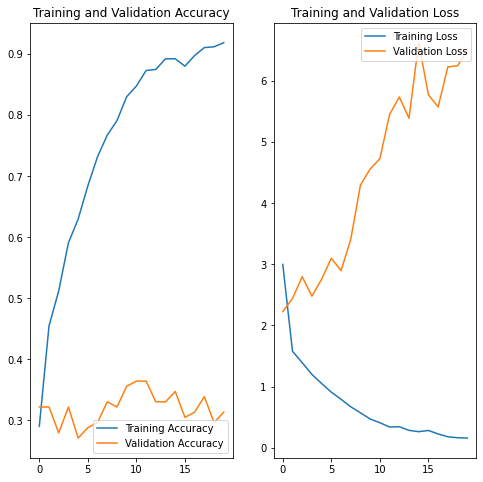

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

There is a clear sign of model overfitting as the training score very high and validation score is very low. Comming forth we will try to regularize the model

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

image_generator = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    width_shift_range=[-90,90],
    height_shift_range=0.5,
    horizontal_flip=True,
    rotation_range=90,
    brightness_range=[0.2,1.0]
    )



train_data_gen = image_generator.flow_from_directory(directory=data_dir_train,
                                                     batch_size=batch_size,
                                                     shuffle=True,
                                                     target_size=(img_height,img_width),
                                                     classes = class_names)
test_data_gen = image_generator.flow_from_directory(directory=data_dir_test,
                                                     batch_size=batch_size,
                                                     shuffle=True,
                                                     target_size=(img_height,img_width),
                                                     classes = class_names)

Found 2239 images belonging to 9 classes.
Found 118 images belonging to 9 classes.


In [ ]:
CLASS_NAMES = np.array([item.name for item in data_dir_train.glob('*/')])
CLASS_NAMES

array(['nevus', 'basal cell carcinoma', 'melanoma', 'vascular lesion',
       'actinic keratosis', 'squamous cell carcinoma', 'dermatofibroma',
       'pigmented benign keratosis', 'seborrheic keratosis'], dtype='<U26')

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
# We can inspect how a batch is created
def show_batch(image_batch, label_batch):
    plt.figure(figsize=(10,10))
    for n in range(25):
        ax = plt.subplot(5,5,n+1)
        # plt.imshow(cv2.cvtColor(image_batch[n], cv2.COLOR_BGR2RGB))
        plt.imshow(image_batch[n])
        plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
        plt.axis('off')

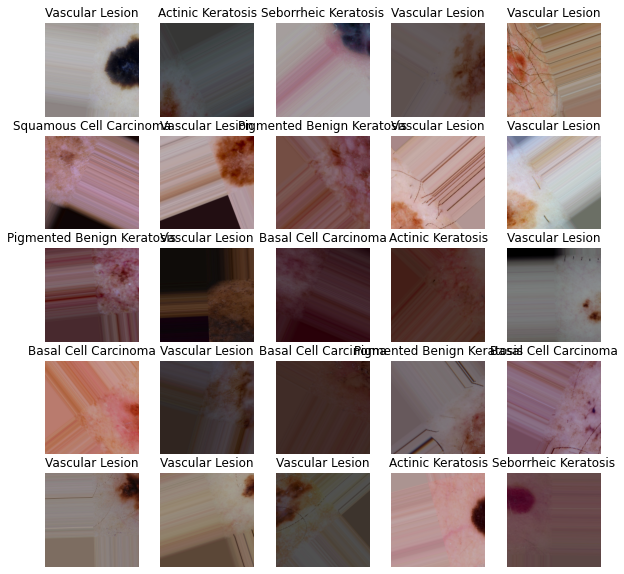

In [ ]:
image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)

### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
model2=Sequential([
 #                 layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height,img_width,3)),
                  layers.Conv2D(32,kernel_size=(3,3),activation="relu",kernel_initializer="he_normal",input_shape=(img_height,img_width,3)),
                  layers.MaxPool2D((2,2)),
                  layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
                  layers.MaxPool2D(pool_size=(2,2)),
                  layers.Dropout(0.25),
                  layers.Flatten(),
                  layers.Dense(128,activation="relu"),
                  layers.Dense(len(class_names),activation="softmax")
])


### Compiling the model

In [ ]:
## Your code goes here
model2.compile(optimizer='adam',
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model2.fit(
  train_data_gen,
  validation_data=test_data_gen,
  epochs=epochs,
  
)

Epoch 1/20
70/70 [==============================] - 59s 836ms/step - loss: 6.4240 - accuracy: 0.1833 - val_loss: 2.3390 - val_accuracy: 0.1610
Epoch 2/20
70/70 [==============================] - 56s 800ms/step - loss: 1.9374 - accuracy: 0.2835 - val_loss: 2.1343 - val_accuracy: 0.2373
Epoch 3/20
70/70 [==============================] - 55s 791ms/step - loss: 1.8600 - accuracy: 0.3187 - val_loss: 2.2671 - val_accuracy: 0.2203
Epoch 4/20
70/70 [==============================] - 55s 796ms/step - loss: 1.7657 - accuracy: 0.3571 - val_loss: 2.2800 - val_accuracy: 0.3051
Epoch 5/20
70/70 [==============================] - 55s 792ms/step - loss: 1.7043 - accuracy: 0.3758 - val_loss: 2.0835 - val_accuracy: 0.2966
Epoch 6/20
70/70 [==============================] - 55s 791ms/step - loss: 1.6351 - accuracy: 0.4018 - val_loss: 2.2352 - val_accuracy: 0.2797
Epoch 7/20
70/70 [==============================] - 55s 791ms/step - loss: 1.6696 - accuracy: 0.4099 - val_loss: 2.0147 - val_accuracy: 0.3220

### Visualizing the results

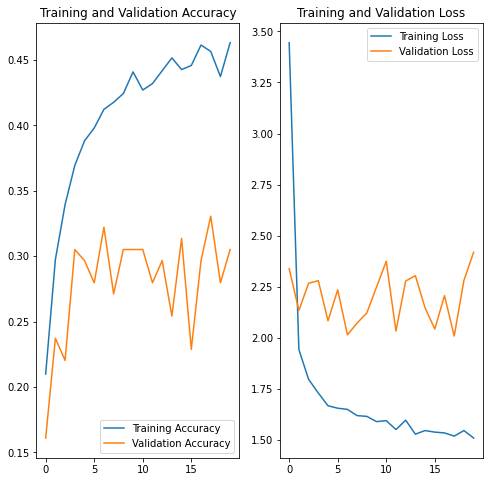

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
## Your code goes here.
total_images=len(list(data_dir_train.glob('*/*.jpg')))
print("Total Images are {tlt}".format(tlt=total_images))

dst_data=[]
for classes in class_names:
  n=len(list(data_dir_train.glob(classes+'/*.jpg')))
  prc=round(((n/total_images)*100),2)
  print("{cl} is {prc}% and {cnt} in count".format(cl = classes, prc = prc,cnt=n))
  dst_data.append([classes,n])

dst_data=pd.DataFrame(dst_data, columns = ['Class', 'Count'])

Total Images are 2239
actinic keratosis is 5.09% and 114 in count
basal cell carcinoma is 16.79% and 376 in count
dermatofibroma is 4.24% and 95 in count
melanoma is 19.56% and 438 in count
nevus is 15.94% and 357 in count
pigmented benign keratosis is 20.63% and 462 in count
seborrheic keratosis is 3.44% and 77 in count
squamous cell carcinoma is 8.08% and 181 in count
vascular lesion is 6.21% and 139 in count


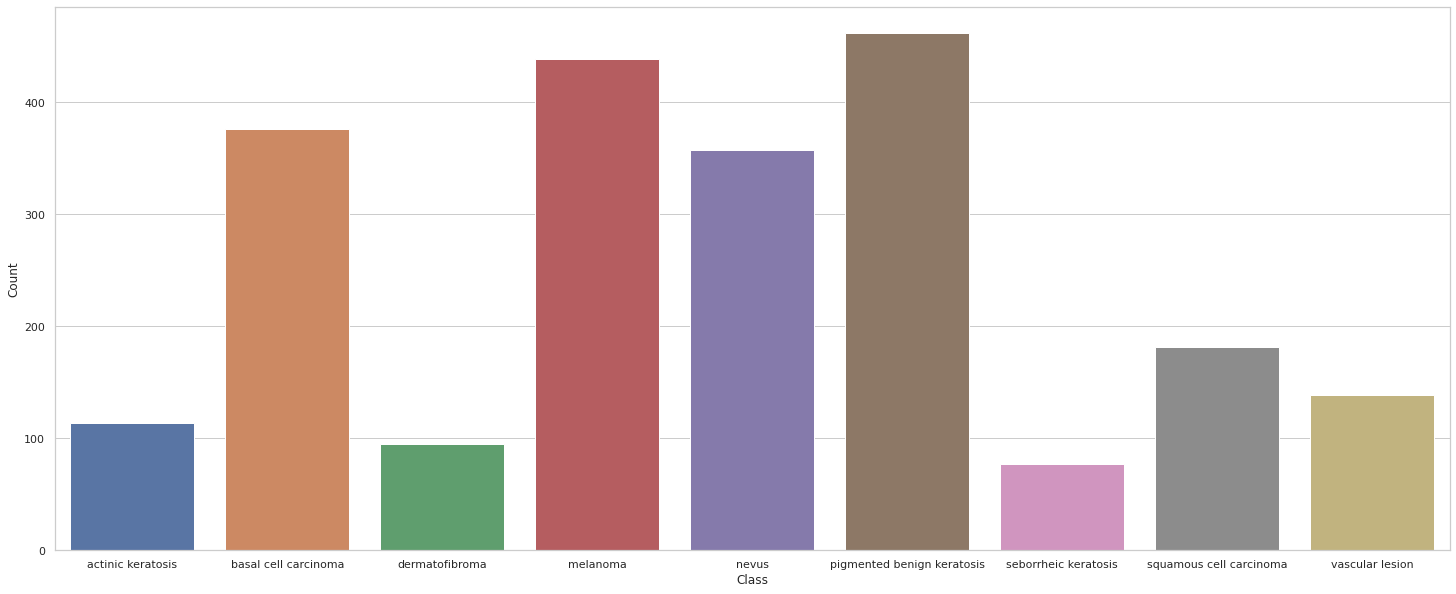

In [ ]:
from matplotlib import pyplot
import seaborn as sns



a4_dims = (25, 10)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Class", y="Count", data=dst_data,ax=ax)

plt.show()

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [9]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [10]:
path_to_training_dataset="/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    directory=path_to_training_dataset + i
    p = Augmentor.Pipeline(source_directory=directory,output_directory=directory)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 114 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FCE300F9610>: 100%|██████████| 500/500 [00:15<00:00, 31.28 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 376 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FCE300C96D0>: 100%|██████████| 500/500 [00:15<00:00, 31.71 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 95 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FCE4FF1B210>: 100%|██████████| 500/500 [00:16<00:00, 31.06 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7FCE3005E8D0>: 100%|██████████| 500/500 [01:27<00:00,  5.73 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7FCE300ABE90>: 100%|██████████| 500/500 [01:15<00:00,  6.61 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 462 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FCE48F57710>: 100%|██████████| 500/500 [00:16<00:00, 31.19 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FCE4FF18850>: 100%|██████████| 500/500 [00:38<00:00, 12.87 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 181 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FCE301720D0>: 100%|██████████| 500/500 [00:15<00:00, 31.65 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FCE300DCE90>:   1%|          | 5/500 [00:00<00:50,  9.81 Samples/s]

Initialised with 139 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FCE48FB7790>: 100%|██████████| 500/500 [00:16<00:00, 30.30 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

### Lets see the distribution of augmented data after adding new images to the original training data.

In [15]:
## Your code goes here.
total_images=len(list(data_dir_train.glob('*/*.jpg')))
print("Total Images are {tlt}".format(tlt=total_images))

dst_data=[]
for classes in class_names:
  n=len(list(data_dir_train.glob(classes+'/*.jpg')))
  prc=round(((n/total_images)*100),2)
  print("{cl} is {prc}% and {cnt} in count".format(cl = classes, prc = prc,cnt=n))
  dst_data.append([classes,n])

dst_data=pd.DataFrame(dst_data, columns = ['Class', 'Count'])

Total Images are 6739
actinic keratosis is 9.11% and 614 in count
basal cell carcinoma is 13.0% and 876 in count
dermatofibroma is 8.83% and 595 in count
melanoma is 13.92% and 938 in count
nevus is 12.72% and 857 in count
pigmented benign keratosis is 14.28% and 962 in count
seborrheic keratosis is 8.56% and 577 in count
squamous cell carcinoma is 10.11% and 681 in count
vascular lesion is 9.48% and 639 in count


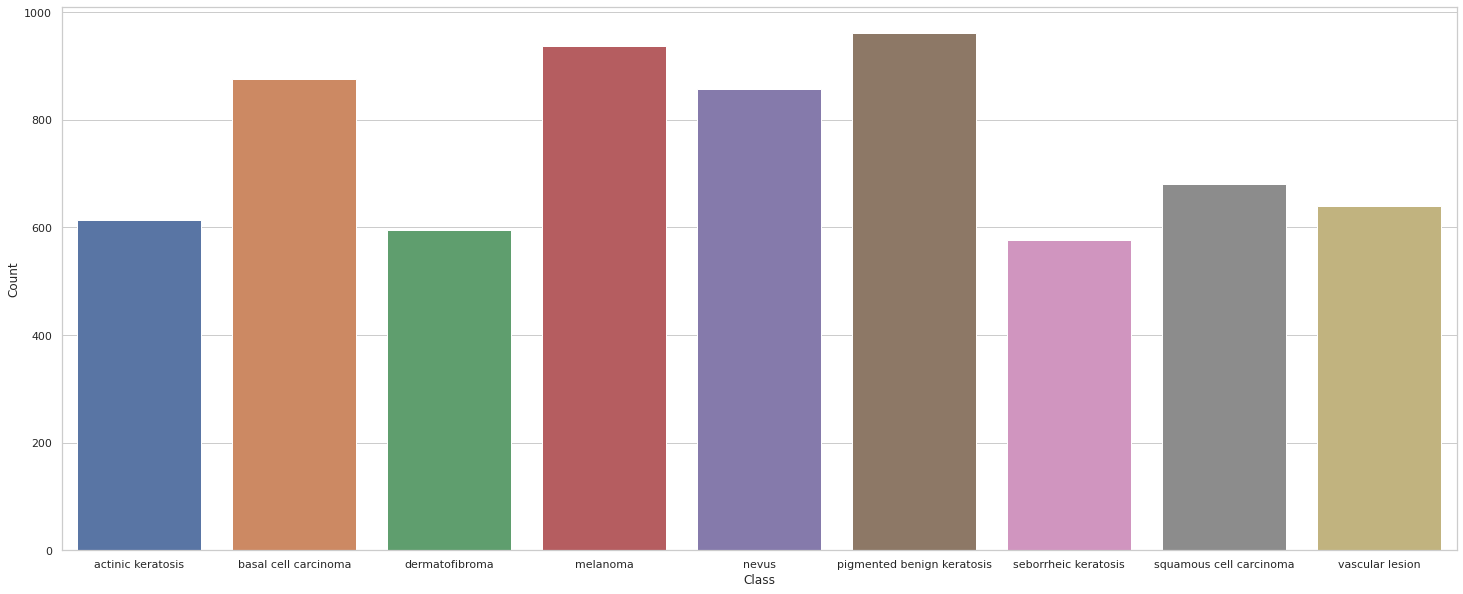

In [16]:
from matplotlib import pyplot
import seaborn as sns
a4_dims = (25, 10)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Class", y="Count", data=dst_data,ax=ax)

plt.show()

In [17]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)

6739


You can see tha the data distribution is same as we have added 500 images accross all classes but we can solve the issues where data was very less for particular classes. Earlier we had only 2239 training images but now with augmentation we have increased it to 6739 which is additional 4500 images (500*9)

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [18]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [19]:

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [20]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
      data_dir_test,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 118 files belonging to 9 classes.
Using 23 files for validation.


In [21]:
image_generator = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    # width_shift_range=[-90,90],
    # height_shift_range=0.5,
    # horizontal_flip=True,
    # rotation_range=90,
    # brightness_range=[0.2,1.0]
    )



train_data_gen = image_generator.flow_from_directory(directory=data_dir_train,
                                                     batch_size=batch_size,
                                                     shuffle=True,
                                                     target_size=(img_height,img_width),
                                                     classes = class_names)
test_data_gen = image_generator.flow_from_directory(directory=data_dir_test,
                                                     batch_size=batch_size,
                                                     shuffle=True,
                                                     target_size=(img_height,img_width),
                                                     classes = class_names)

Found 6739 images belonging to 9 classes.
Found 118 images belonging to 9 classes.


#### **Todo:** Create your model (make sure to include normalization)

In [ ]:
from keras.regularizers import l2
## your code goes here
model3=Sequential([
                  layers.Conv2D(32,kernel_size=(3,3),activation="relu",kernel_initializer="he_normal",input_shape=(img_height,img_width,3), kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)),
                  layers.MaxPool2D((2,2)),
                  layers.Dropout(0.2),
                  layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
                  layers.MaxPool2D(pool_size=(2,2)),
                  layers.Dropout(0.2),
                  layers.Conv2D(128,kernel_size=(3,3),activation="relu"),
                  layers.MaxPool2D(pool_size=(2,2)),
                  layers.Dropout(0.25),
                  layers.Flatten(),
                  layers.Dense(128,activation="relu"),
                  layers.Dropout(0.2),
                  layers.Dense(len(class_names),activation="softmax")
])


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
## Your code goes here
opt = keras.optimizers.Adam(learning_rate=0.1) #0.007
model3.compile(optimizer=opt,
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [ ]:
model3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 89, 89, 32)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 87, 87, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 43, 43, 64)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 43, 43, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 41, 41, 128)      

#### **Todo:**  Train your model

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

6739
118


In [ ]:
STEPS_PER_EPOCH = np.ceil((image_count_train+image_count_test)/batch_size)
STEPS_PER_EPOCH

215.0

In [ ]:
epochs = 30
#STEPS_PER_EPOCH = np.ceil((image_count_train+image_count_test)/batch_size)
history = model3.fit(
  train_data_gen,
  validation_data=test_data_gen,
  epochs=epochs,
#  steps_per_epoch=0.1
)

Epoch 1/30
211/211 [==============================] - 79s 371ms/step - loss: 580049761.9756 - accuracy: 0.1207 - val_loss: 175.0928 - val_accuracy: 0.1356
Epoch 2/30
211/211 [==============================] - 75s 357ms/step - loss: 174.6265 - accuracy: 0.1274 - val_loss: 173.6028 - val_accuracy: 0.1356
Epoch 3/30
211/211 [==============================] - 75s 357ms/step - loss: 173.2246 - accuracy: 0.1318 - val_loss: 172.0863 - val_accuracy: 0.1356
Epoch 4/30
211/211 [==============================] - 75s 355ms/step - loss: 171.8061 - accuracy: 0.1207 - val_loss: 170.7181 - val_accuracy: 0.1356
Epoch 5/30
211/211 [==============================] - 75s 355ms/step - loss: 170.4662 - accuracy: 0.1281 - val_loss: 169.5697 - val_accuracy: 0.0254
Epoch 6/30
211/211 [==============================] - 75s 354ms/step - loss: 169.2924 - accuracy: 0.1221 - val_loss: 168.3599 - val_accuracy: 0.1356
Epoch 7/30
211/211 [==============================] - 75s 355ms/step - loss: 168.1446 - accuracy: 0.

#### **Todo:**  Visualize the model results

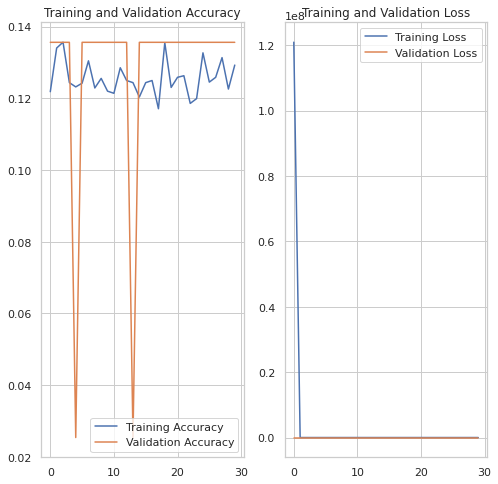

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



yes the handeling the class imbalance heleped and we get rid of overfitting.

In [ ]:
from keras.regularizers import l2
## your code goes here
model4=Sequential([
                  layers.Conv2D(32,kernel_size=(3,3),activation="relu",kernel_initializer="he_normal",input_shape=(img_height,img_width,3), kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)),
                  layers.MaxPool2D((2,2)),
                  layers.Dropout(0.2),
                  layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
                  layers.MaxPool2D(pool_size=(2,2)),
                  layers.Dropout(0.2),
                  layers.Conv2D(128,kernel_size=(3,3),activation="relu"),
                  layers.MaxPool2D(pool_size=(2,2)),
                  layers.Dropout(0.25),
                  layers.Flatten(),
                  layers.Dense(128,activation="relu"),
                  layers.Dense(len(class_names),activation="softmax")
])
## Your code goes here
opt = keras.optimizers.Adam(learning_rate=2.5) #0.007
# model4.compile(optimizer=opt,
#               loss=keras.losses.categorical_crossentropy,
#               metrics=['accuracy'])


model4.compile(optimizer=opt,
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

epochs = 100
#STEPS_PER_EPOCH = np.ceil((image_count_train+image_count_test)/batch_size)
history = model4.fit(
  train_data_gen,
  validation_data=test_data_gen,
  epochs=epochs,
#  steps_per_epoch=0.1
)

Epoch 1/100
211/211 [==============================] - 79s 372ms/step - loss: 43438491889.5251 - accuracy: 0.1167 - val_loss: 1222.2134 - val_accuracy: 0.1356
Epoch 2/100
211/211 [==============================] - 76s 362ms/step - loss: 296641.9723 - accuracy: 0.1273 - val_loss: 3986.3164 - val_accuracy: 0.1356
Epoch 3/100
211/211 [==============================] - 75s 356ms/step - loss: 31368916.4344 - accuracy: 0.1255 - val_loss: 3024.0156 - val_accuracy: 0.1356
Epoch 4/100
211/211 [==============================] - 75s 357ms/step - loss: 3030.2562 - accuracy: 0.1133 - val_loss: 3028.8992 - val_accuracy: 0.1356
Epoch 5/100
211/211 [==============================] - 75s 356ms/step - loss: 3028.0683 - accuracy: 0.1302 - val_loss: 3025.0886 - val_accuracy: 0.1356
Epoch 6/100
211/211 [==============================] - 75s 355ms/step - loss: 3024.3266 - accuracy: 0.1172 - val_loss: 3021.3220 - val_accuracy: 0.1356
Epoch 7/100
211/211 [==============================] - 75s 356ms/step - los

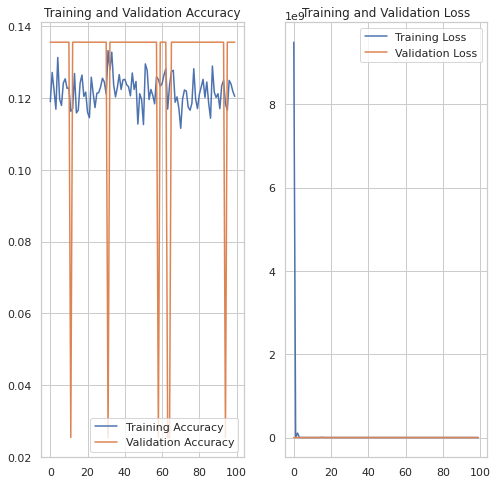

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [28]:
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
model5 = Sequential()
model5.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(img_height,img_width,3)))

model5.add(Activation('relu'))
model5.add(BatchNormalization())
model5.add(Conv2D(32, (3, 3)))
model5.add(Activation('relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.25))

model5.add(Conv2D(64, (3, 3), padding='same'))
model5.add(Activation('relu'))
model5.add(BatchNormalization())
model5.add(Conv2D(64, (3, 3)))
model5.add(Activation('relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.25))

# an additional conv unit 
# model5.add(Conv2D(128, (3, 3), padding='same'))
# model5.add(Activation('relu'))
# model5.add(BatchNormalization())
# model5.add(Conv2D(128, (3, 3)))
# model5.add(Activation('relu'))
# model5.add(BatchNormalization())
# model5.add(MaxPooling2D(pool_size=(2, 2)))
# model5.add(Dropout(0.25))

model5.add(Flatten())
model5.add(Dense(512))
model5.add(Activation('relu'))
model5.add(Dropout(0.2))
model5.add(Dense(len(class_names)))
model5.add(Activation('softmax'))

model5.compile(optimizer="adam",
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

epochs = 30

history = model5.fit(
  train_data_gen,
  validation_data=test_data_gen,
  epochs=epochs,
)

Epoch 1/30
211/211 [==============================] - 85s 398ms/step - loss: 22.8278 - accuracy: 0.2601 - val_loss: 77.2987 - val_accuracy: 0.0593
Epoch 2/30
211/211 [==============================] - 81s 385ms/step - loss: 1.8474 - accuracy: 0.2888 - val_loss: 33.4277 - val_accuracy: 0.1356
Epoch 3/30
211/211 [==============================] - 83s 393ms/step - loss: 1.7223 - accuracy: 0.3409 - val_loss: 17.3768 - val_accuracy: 0.1949
Epoch 4/30
211/211 [==============================] - 83s 392ms/step - loss: 1.5651 - accuracy: 0.3998 - val_loss: 5.1058 - val_accuracy: 0.2288
Epoch 5/30
211/211 [==============================] - 83s 395ms/step - loss: 1.5384 - accuracy: 0.4035 - val_loss: 2.9215 - val_accuracy: 0.2542
Epoch 6/30
211/211 [==============================] - 83s 393ms/step - loss: 1.4538 - accuracy: 0.4261 - val_loss: 4.2252 - val_accuracy: 0.2288
Epoch 7/30
211/211 [==============================] - 83s 393ms/step - loss: 1.3636 - accuracy: 0.4620 - val_loss: 4.1582 - va

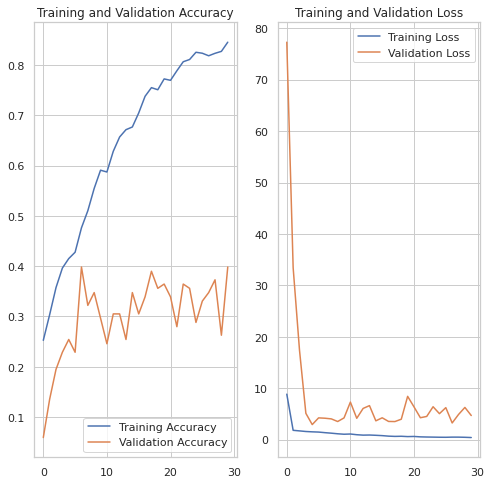

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [41]:
image_generator = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    width_shift_range=[-90,90],
    height_shift_range=0.5,
    horizontal_flip=True,
    rotation_range=90,
    brightness_range=[0.2,1.0]
    )



train_data_gen = image_generator.flow_from_directory(directory=data_dir_train,
                                                     batch_size=batch_size,
                                                     shuffle=True,
                                                     target_size=(img_height,img_width),
                                                     classes = class_names)
test_data_gen = image_generator.flow_from_directory(directory=data_dir_test,
                                                     batch_size=batch_size,
                                                     shuffle=True,
                                                     target_size=(img_height,img_width),
                                                     classes = class_names)

model5 = Sequential()
model5.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(img_height,img_width,3)))

model5.add(Activation('relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Conv2D(64, (3, 3)))
model5.add(Activation('relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.2))

model5.add(Conv2D(128, (3, 3)))
model5.add(Activation('relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.25))

model5.add(Conv2D(256, (3, 3)))
model5.add(Activation('relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.2))

# # an additional conv unit 
# model5.add(Conv2D(128, (3, 3)))
# model5.add(Activation('relu'))
# model5.add(BatchNormalization())
# model5.add(MaxPooling2D(pool_size=(2, 2)))
# model5.add(Dropout(0.25))

# an additional conv unit 
# model5.add(Conv2D(128, (3, 3)))
# model5.add(Activation('relu'))
# model5.add(BatchNormalization())
# model5.add(MaxPooling2D(pool_size=(2, 2)))
# model5.add(Dropout(0.25))

# # an additional conv unit 
# model5.add(Conv2D(512, (3, 3), padding='same'))
# model5.add(Activation('relu'))
# model5.add(BatchNormalization())

model5.add(Flatten())
# model5.add(Dense(256))
# model5.add(Activation('relu'))
# model5.add(Dropout(0.2))
model5.add(Dense(512))
model5.add(Activation('relu'))
model5.add(Dropout(0.2))
model5.add(Dense(len(class_names)))
model5.add(Activation('softmax'))

model5.compile(optimizer="adam",
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

epochs = 30

history = model5.fit(
  train_data_gen,
  validation_data=test_data_gen,
  epochs=epochs,
)

Found 6739 images belonging to 9 classes.
Found 118 images belonging to 9 classes.
Epoch 1/30
211/211 [==============================] - 132s 621ms/step - loss: 7.3446 - accuracy: 0.1976 - val_loss: 14.2410 - val_accuracy: 0.0932
Epoch 2/30
211/211 [==============================] - 128s 604ms/step - loss: 1.9263 - accuracy: 0.2403 - val_loss: 7.2229 - val_accuracy: 0.1102
Epoch 3/30
211/211 [==============================] - 127s 603ms/step - loss: 1.9139 - accuracy: 0.2551 - val_loss: 2.4761 - val_accuracy: 0.2373
Epoch 4/30
211/211 [==============================] - 127s 602ms/step - loss: 1.8732 - accuracy: 0.2682 - val_loss: 2.1229 - val_accuracy: 0.2542
Epoch 5/30
211/211 [==============================] - 127s 603ms/step - loss: 1.8257 - accuracy: 0.2875 - val_loss: 2.6190 - val_accuracy: 0.2458
Epoch 6/30
211/211 [==============================] - 127s 603ms/step - loss: 1.8129 - accuracy: 0.2927 - val_loss: 2.3312 - val_accuracy: 0.2373
Epoch 7/30
211/211 [====================

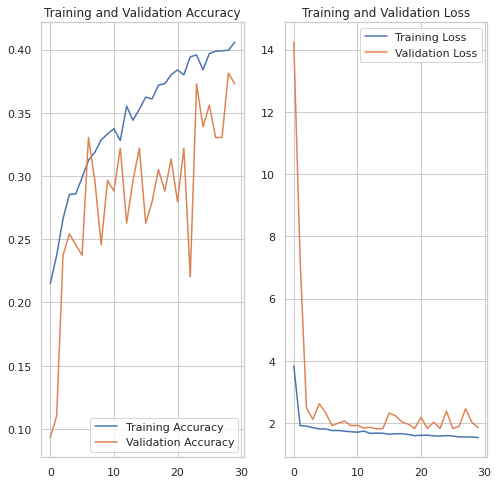

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Finally we a formed a model which is not overfitting and the loss is also decreasing